# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | invercargill
Processing Record 2 of Set 1 | flying fish cove
Processing Record 3 of Set 1 | niafunke
Processing Record 4 of Set 1 | west island
Processing Record 5 of Set 1 | ayaviri
Processing Record 6 of Set 1 | gallivare
City not found. Skipping...
Processing Record 7 of Set 1 | lihue
Processing Record 8 of Set 1 | tazovsky
Processing Record 9 of Set 1 | butte
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | ndjole
Processing Record 13 of Set 1 | conduaga
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | malakal
Processing Record 16 of Set 1 | minas de marcona
Processing Record 17 of Set 1 | iqaluit
Processing Record 18 of Set 1 | laojunmiao
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | maragogi
Processing Record 21 of Set 1 | uturoa
Processing Record 22 of Set 1 | port-aux-fra

Processing Record 36 of Set 4 | sandnessjoen
Processing Record 37 of Set 4 | kapit
Processing Record 38 of Set 4 | longyearbyen
Processing Record 39 of Set 4 | mar del plata
Processing Record 40 of Set 4 | nizhnesortymskiy
Processing Record 41 of Set 4 | tevragh zeina
City not found. Skipping...
Processing Record 42 of Set 4 | acapulco de juarez
Processing Record 43 of Set 4 | roma
Processing Record 44 of Set 4 | saipan
Processing Record 45 of Set 4 | saudarkrokur
Processing Record 46 of Set 4 | la sarre
Processing Record 47 of Set 4 | kadugli
Processing Record 48 of Set 4 | bikenibeu village
Processing Record 49 of Set 4 | aldan
Processing Record 0 of Set 5 | tukrah
Processing Record 1 of Set 5 | kargat
Processing Record 2 of Set 5 | callao
Processing Record 3 of Set 5 | codrington
Processing Record 4 of Set 5 | carnarvon
Processing Record 5 of Set 5 | vrnjacka banja
Processing Record 6 of Set 5 | puerto deseado
Processing Record 7 of Set 5 | mutuali
Processing Record 8 of Set 5 | bar

Processing Record 26 of Set 8 | bajina basta
Processing Record 27 of Set 8 | kos
Processing Record 28 of Set 8 | nova vicosa
Processing Record 29 of Set 8 | vila franca do campo
Processing Record 30 of Set 8 | tranovaho
City not found. Skipping...
Processing Record 31 of Set 8 | aitape
Processing Record 32 of Set 8 | tabas
Processing Record 33 of Set 8 | stalpeni
Processing Record 34 of Set 8 | indramayu
Processing Record 35 of Set 8 | antsiranana
Processing Record 36 of Set 8 | chinchilla
Processing Record 37 of Set 8 | philadelphia
Processing Record 38 of Set 8 | at taj
Processing Record 39 of Set 8 | malango
Processing Record 40 of Set 8 | mazyr
Processing Record 41 of Set 8 | orsha
Processing Record 42 of Set 8 | amahai
Processing Record 43 of Set 8 | pinheiro machado
Processing Record 44 of Set 8 | katsuura
Processing Record 45 of Set 8 | umluj
Processing Record 46 of Set 8 | kapuskasing
Processing Record 47 of Set 8 | raigarh
Processing Record 48 of Set 8 | xilin hot
Processing R

Processing Record 14 of Set 12 | ratnagiri
Processing Record 15 of Set 12 | cachoeira
Processing Record 16 of Set 12 | la jolla
Processing Record 17 of Set 12 | tanjung selor
Processing Record 18 of Set 12 | alenquer
Processing Record 19 of Set 12 | south upi
Processing Record 20 of Set 12 | grand falls-windsor
Processing Record 21 of Set 12 | ayaguz
City not found. Skipping...
Processing Record 22 of Set 12 | alvaraes
Processing Record 23 of Set 12 | gebeit
Processing Record 24 of Set 12 | pante makasar
City not found. Skipping...
Processing Record 25 of Set 12 | manokwari
Processing Record 26 of Set 12 | rosarito
Processing Record 27 of Set 12 | san patricio
Processing Record 28 of Set 12 | mahabe
City not found. Skipping...
Processing Record 29 of Set 12 | piensk
Processing Record 30 of Set 12 | selfoss
Processing Record 31 of Set 12 | alibag
Processing Record 32 of Set 12 | port pirie
Processing Record 33 of Set 12 | palu
Processing Record 34 of Set 12 | inarajan village
Processing

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,35.02,91,91,11.01,NZ,1726506749
1,flying fish cove,-10.4217,105.6791,76.68,83,100,8.05,CX,1726506750
2,niafunke,15.9322,-3.9906,90.54,47,69,11.45,ML,1726506751
3,west island,-12.1568,96.8225,78.78,73,73,19.57,CC,1726506752
4,ayaviri,-14.8864,-70.5889,64.26,23,38,6.80,PE,1726506753


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,35.02,91,91,11.01,NZ,1726506749
1,flying fish cove,-10.4217,105.6791,76.68,83,100,8.05,CX,1726506750
2,niafunke,15.9322,-3.9906,90.54,47,69,11.45,ML,1726506751
3,west island,-12.1568,96.8225,78.78,73,73,19.57,CC,1726506752
4,ayaviri,-14.8864,-70.5889,64.26,23,38,6.80,PE,1726506753


In [19]:
city_data_df.columns


Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

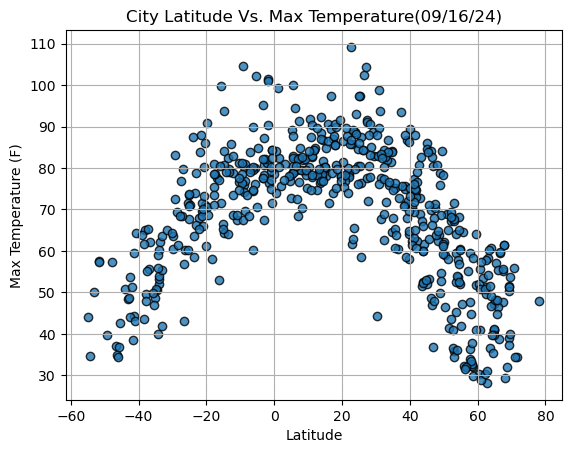

In [20]:
# Build scatter plot for latitude vs. temperature
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]



plt.scatter(lats,
            max_temps,
            edgecolor="black", 
            linewidth=1, 
            marker="o",
            alpha=0.8, 
            label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

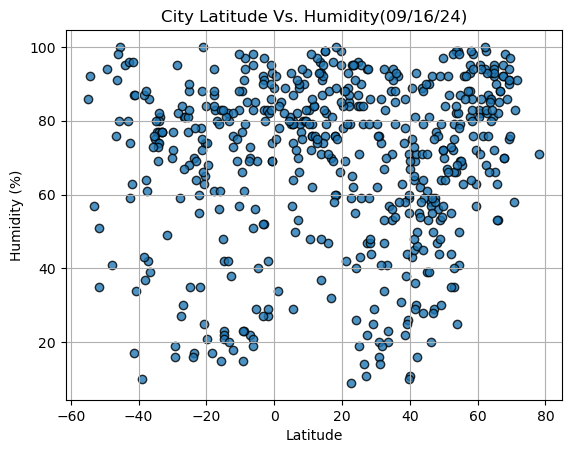

In [21]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", 
            linewidth=1, 
            marker="o",
            alpha=0.8, 
            label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

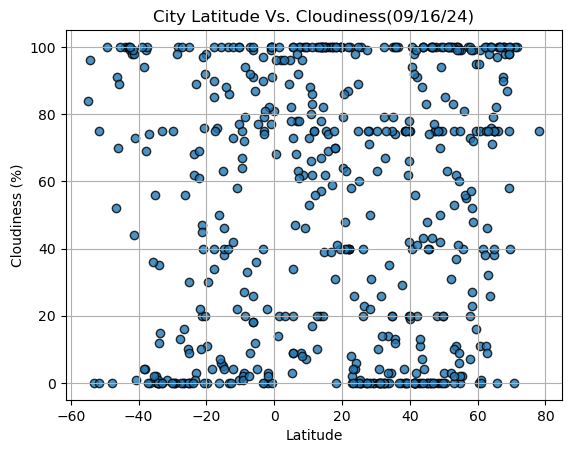

In [22]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", 
            linewidth=1, marker="o",
            alpha=0.8, 
            label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

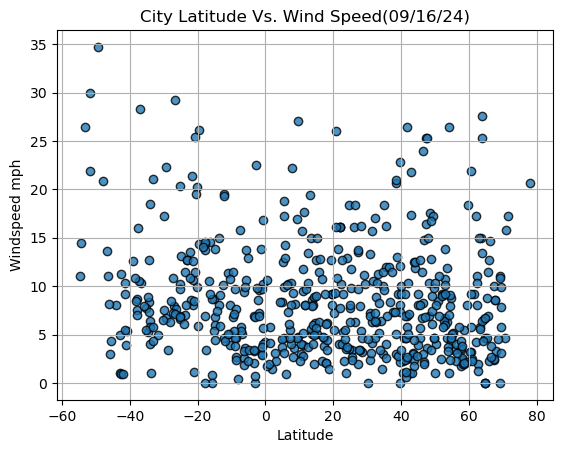

In [23]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", 
            linewidth=1, 
            marker="o",
            alpha=0.8, 
            label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Windspeed mph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,niafunke,15.9322,-3.9906,90.54,47,69,11.45,ML,1726506751
5,lihue,21.9789,-159.3672,78.39,85,40,16.11,US,1726506756
6,tazovsky,67.4667,78.7000,47.59,95,100,10.04,RU,1726506757
7,butte,39.6499,-121.5677,64.18,55,20,8.05,US,1726506758
11,conduaga,8.8620,117.4893,79.25,90,100,8.14,PH,1726506762


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,35.02,91,91,11.01,NZ,1726506749
1,flying fish cove,-10.4217,105.6791,76.68,83,100,8.05,CX,1726506750
3,west island,-12.1568,96.8225,78.78,73,73,19.57,CC,1726506752
4,ayaviri,-14.8864,-70.5889,64.26,23,38,6.80,PE,1726506753
8,hithadhoo,-0.6000,73.0833,84.36,74,100,10.18,MV,1726506759


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.7624001277861816


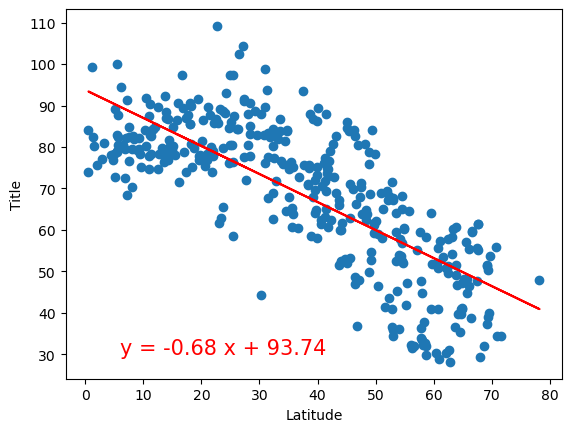

In [27]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

The r-squared is: 0.7881925698100491


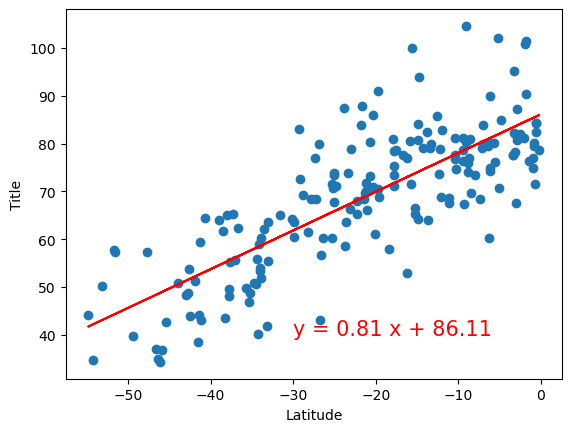

In [28]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.030688018490813908


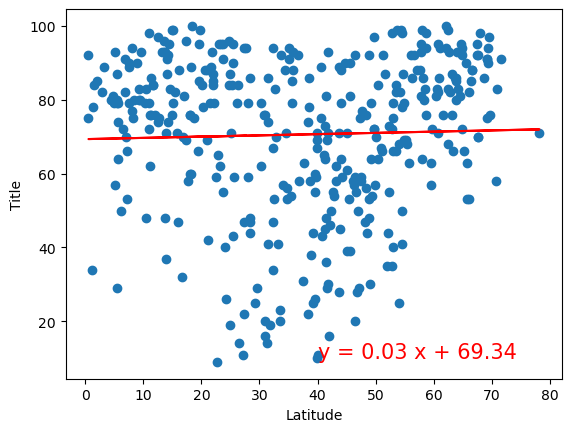

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

The r-squared is: -0.05018715786875371


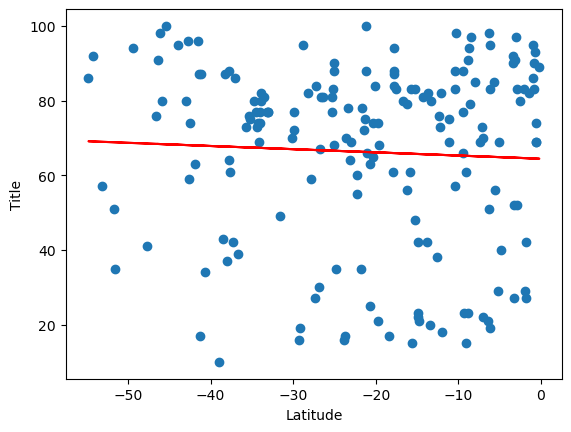

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.012694126705094044


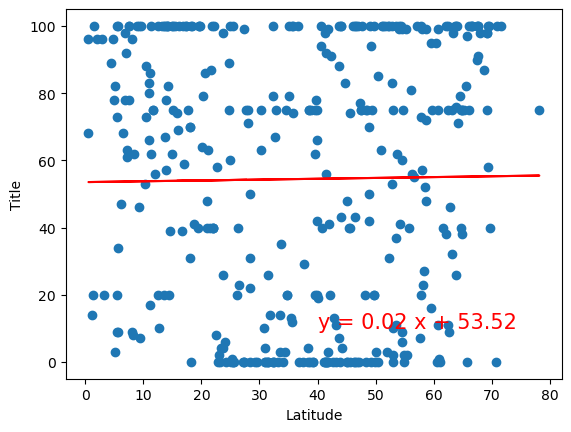

In [31]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: 0.02225600643227289


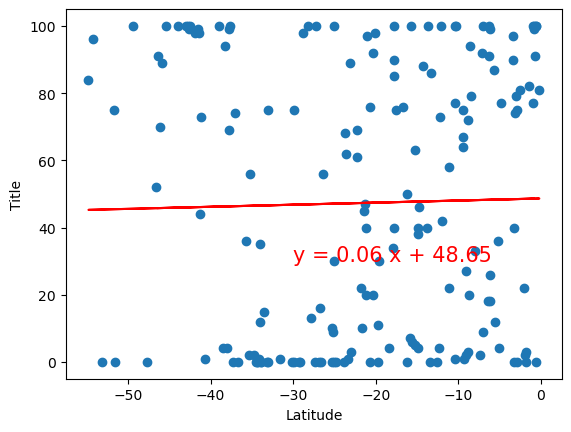

In [32]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.027820243117879773


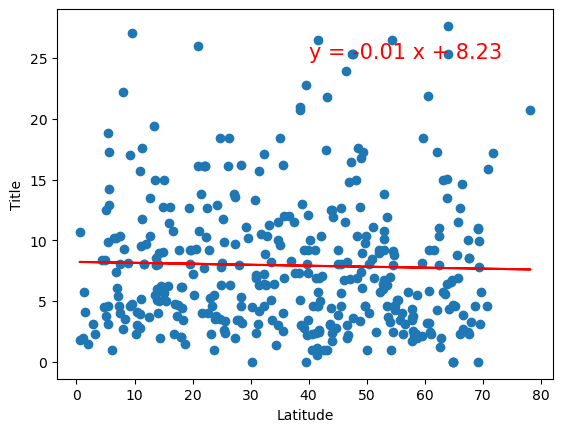

In [35]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (40,25))

The r-squared is: -0.2652221885025044


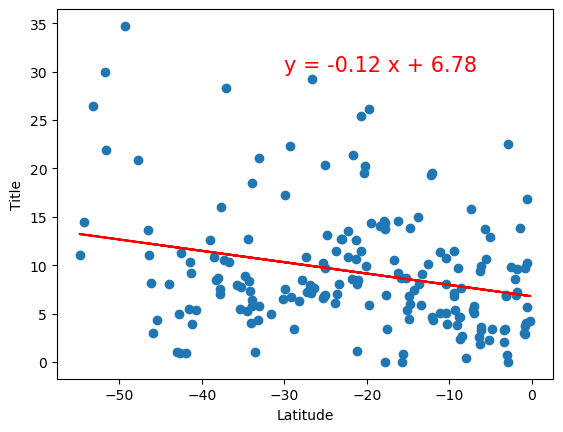

In [36]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE